# Pre-requisites - IMPORTANT!!!

In order to run properly this notebook, you need to:

1. Have a `.env` at the root of your project (You can use `.env.example` with the values on it)
2. Run `export PYTHONPATH=$PWD` in the root of the project

In [1]:
from dotenv import load_dotenv, dotenv_values

In [2]:
from conabio.src.utils.search import SipecamAlfresco, parse_range_date_to_query_value

### Load the environment set at the root (.env)

In [3]:
load_dotenv()
CONFIG = dotenv_values()

### Parameters

- The cumulus you want to extract the images from

- Date intervals you want the images from 

- The output path were the results are going to be saved


In [4]:
CUMULUS = 95
MIN_DATE = "2021-11-01" 
MAX_DATE = "2021-12-01" 

OUTPUT_PATH = "../../../results/search"
FILE_TYPE = "image"

### Constants

In [5]:
BUCKET_NAME = "sipecam-open-data"

## Create the Sipecam object

In [6]:
if CONFIG.get("ALFRESCO_API_ENDPOINT") is None or CONFIG.get("ALFRESCO_API_KEY") is None:
    raise Exception("Keys not detected")
else:
    sipecam_alfresco = SipecamAlfresco(FILE_TYPE, CONFIG)

### Create your query

In this query we want to search for the images in the cumulus 95

When the object is created a first query is created:

In [7]:
sipecam_alfresco.query

'+TYPE: "sipecam:image"'

In order to add properties to the query, we can use the `SipecamAlfresco` method's `add_query_property`

In [8]:
sipecam_alfresco.add_query_property(property="CumulusName", value=CUMULUS)

If it is desired to add a range date, the min and max date must be parsed using the following:

In [9]:
# sipecam_alfresco.add_query_property(property="DateDeployment", value=parse_range_date_to_query_value(MIN_DATE, MAX_DATE))

And the result of the query will be:

In [10]:
sipecam_alfresco.query

'+TYPE: "sipecam:image" AND +(sipecam:CumulusName:95)'

### Call Action to search

In [11]:
sipecam_alfresco.set_output_path(OUTPUT_PATH)

In [12]:
sipecam_alfresco.exahustive_search()

In [13]:
sipecam_alfresco.extract_paths()

## Access to one object

In [23]:
import boto3
import pandas as pd

from PIL import Image
from io import BytesIO

In [15]:
s3_client = boto3.client('s3')

In [16]:
f"{OUTPUT_PATH}/{FILE_TYPE}_path_extract.csv"

'../../../results/search/image_path_extract.csv'

In [17]:
path_df = pd.read_csv(f"{OUTPUT_PATH}/{FILE_TYPE}_path_extract.csv")

In [18]:
path = path_df["item"][0]

## See if the audio exists on the bucket

In [21]:
result = s3_client.list_objects_v2(Bucket=BUCKET_NAME, Prefix=path)

if 'Contents' in result:
    print("Key exists in the bucket.")
    obj = s3_client.get_object(Bucket=BUCKET_NAME, Key=path)
    object_stream = obj['Body'].read()
else:
    print("Key doesn't exist in the bucket.")

Key exists in the bucket.


In [24]:
image = Image.open(BytesIO(object_stream))

print(f"""Width: {image.width}
Height: {image.height}""")

Width: 2048
Height: 1440


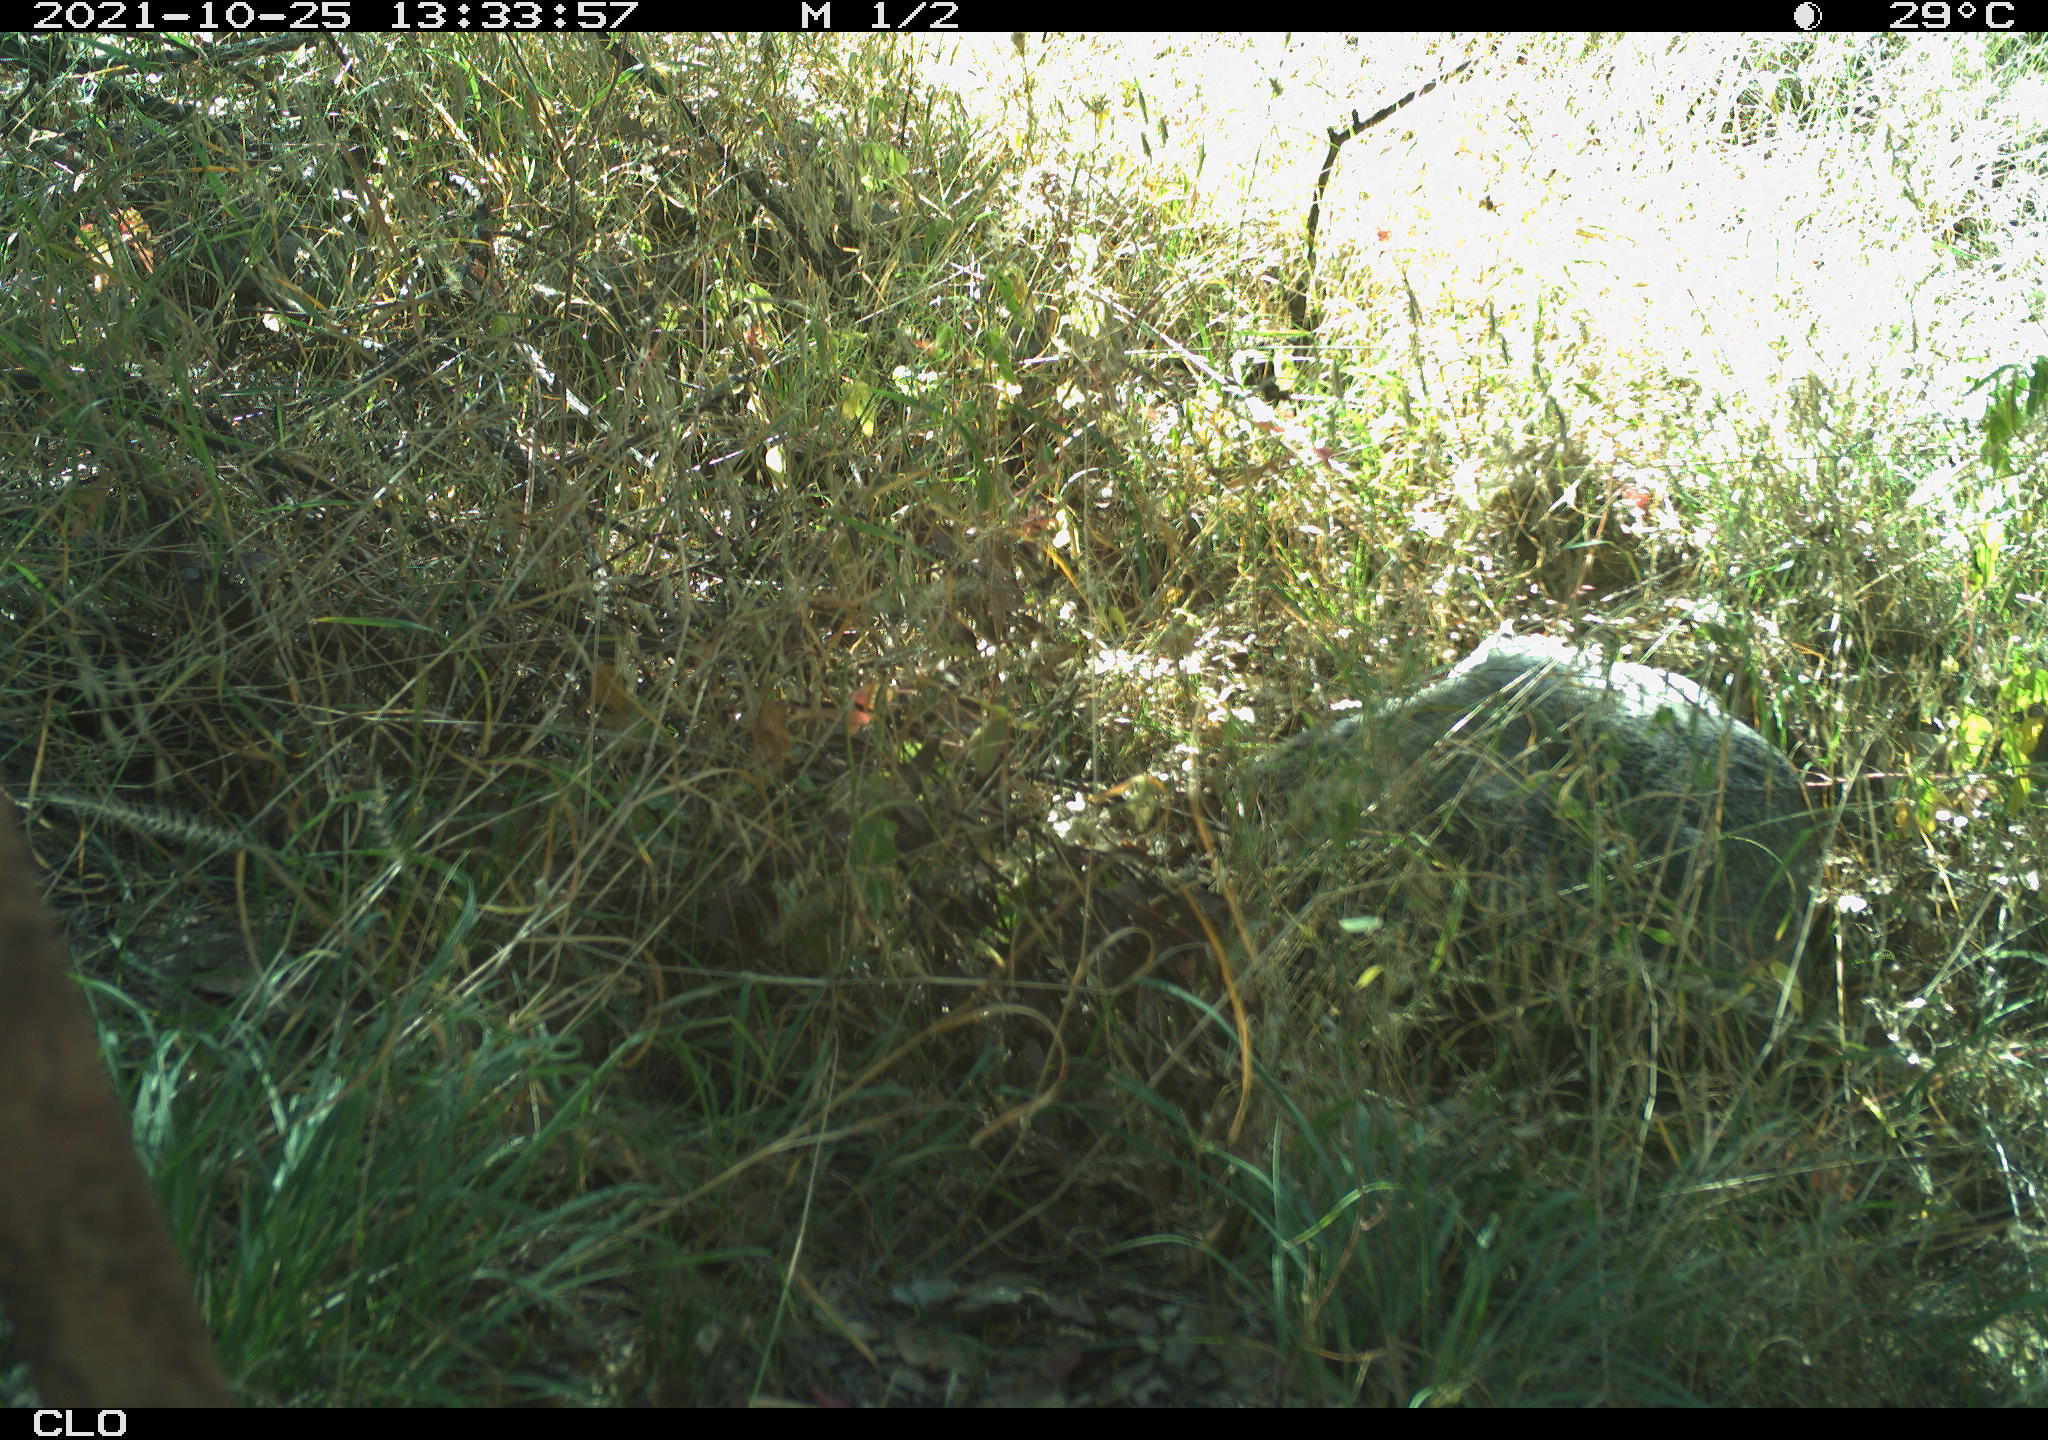

In [25]:
display(image)